In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats





In [2]:
csv_path ="Resources/winemag_data_pandata.csv"
df = pd.read_csv(csv_path)

# Data Profile

In [3]:
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [4]:
column_name = df.columns
column_name

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [5]:
df.count()

Unnamed: 0               129971
country                  129908
description              129971
designation               92506
points                   129971
price                    120975
province                 129908
region_1                 108724
region_2                  50511
taster_name              103727
taster_twitter_handle     98758
title                    129971
variety                  129970
winery                   129971
dtype: int64

# Data Cleaning

In [6]:
#data on wineries
wineries = df.groupby("winery")
count_wine = wineries.count()
sort_wine = count_wine.sort_values("description", ascending=False)
sort_wine.head()



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety
winery,,,,,,,,,,,,,
Wines & Winemakers,222,222,222,222,222,209,222,0,0,222,222,222,222
Testarossa,218,218,218,204,218,217,218,218,218,112,112,218,218
DFJ Vinhos,215,215,215,215,215,209,215,0,0,215,215,215,215
Williams Selyem,211,211,211,185,211,211,211,211,198,91,91,211,211
Louis Latour,199,199,199,111,199,173,199,199,0,185,185,199,199


In [7]:
df_wine = df[["winery", "price"]]
df_wine = df_wine.dropna()
df_wine = df_wine.loc[df_wine["price"] >= 0]
df_WW =df_wine.loc[df_wine["winery"] == "Wines & Winemakers", :]
df_Testa = df_wine.loc[df_wine["winery"] == "Testarossa", :]
df_DFJ = df_wine.loc[df_wine["winery"] == "DFJ Vinhos", :]

In [8]:
#data for countries  
#identified over 1000 entries instead of 10,000
country = df.groupby("country")
count_country = country.count()
sort_country = count_country.sort_values("description", ascending=False)
df1000 = sort_country.loc[sort_country["description"] >= 1000]
df1000

,Unnamed: 0,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
country,,,,,,,,,,,,,
US,54504,54504,36908,54504,54265,54504,54226,50511,37730,34741,54504,54504,54504
France,22093,22093,14530,22093,17776,22093,22017,0,21828,21828,22093,22093,22093
Italy,19540,19540,13889,19540,16914,19540,19513,0,11042,11042,19540,19540,19540
Spain,6645,6645,5320,6645,6573,6645,6637,0,6581,6581,6645,6645,6645
Portugal,5691,5691,5105,5691,4875,5691,0,0,5686,5686,5691,5691,5691
Chile,4472,4472,3879,4472,4416,4472,0,0,4361,4361,4472,4471,4472
Argentina,3800,3800,2902,3800,3756,3800,3747,0,3797,3797,3800,3800,3800
Austria,3345,3345,2825,3345,2799,3345,0,0,3337,3337,3345,3345,3345
Australia,2329,2329,1640,2329,2294,2329,2327,0,2037,2037,2329,2329,2329


In [9]:
df_country = df[["country", "price", "points"]]
df_country = df_country.dropna()
df_country = df_country.loc[df_country["price"] >= 0]
df_US =df_country.loc[df_country["country"] == "US", :]
df_Fr =df_country.loc[df_country["country"] == "France", :]
df_It =df_country.loc[df_country["country"] == "Italy", :]
df_Sp =df_country.loc[df_country["country"] == "Spain", :]
df_P =df_country.loc[df_country["country"] == "Portugal", :]
df_Ch =df_country.loc[df_country["country"] == "Chile", :]
df_Argent =df_country.loc[df_country["country"] == "Argentina", :]
df_Austria =df_country.loc[df_country["country"] == "Austria", :]
df_Au =df_country.loc[df_country["country"] == "Australia", :]
df_Ge =df_country.loc[df_country["country"] == "Germany", :]
df_NZ =df_country.loc[df_country["country"] == "New Zealand", :]
df_SA =df_country.loc[df_country["country"] == "South Africa", :]

In [10]:
#data for linear regression
df_model = df[["price", "points"]]
df_model = df_model.loc[df_model["price"] >= 0]
df_model = df_model.dropna()
df_model.head()

,price,points
1,15.0,87
2,14.0,87
3,13.0,87
4,65.0,87
5,15.0,87


# EDA

In [11]:
#3 Top Vineyards
#changed bin size
print(df_WW.max(),df_Testa.max(),df_DFJ.max())
print(df_WW.min(),df_Testa.min(),df_DFJ.min())

winery    Wines & Winemakers
price                     77
dtype: object winery    Testarossa
price             87
dtype: object winery    DFJ Vinhos
price             50
dtype: object
winery    Wines & Winemakers
price                      9
dtype: object winery    Testarossa
price             18
dtype: object winery    DFJ Vinhos
price              6
dtype: object


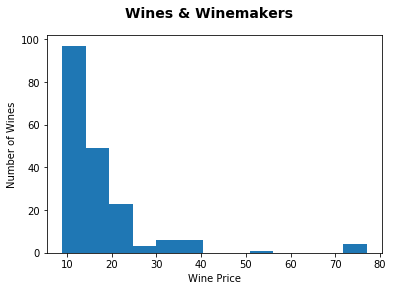

In [12]:
n_bins1 = int((77-9)/5)

fig, axs = plt.subplots()

axs.hist(df_WW["price"], bins=n_bins1)
fig.suptitle("Wines & Winemakers", fontsize=14, fontweight="bold")
axs.set_xlabel("Wine Price")
axs.set_ylabel("Number of Wines")

plt.show()

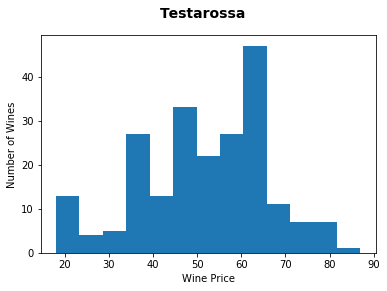

In [13]:
n_bins2 = int((87-18)/5)
fig, axs = plt.subplots()
axs.hist(df_Testa["price"], bins=n_bins2)
fig.suptitle("Testarossa", fontsize=14, fontweight="bold")
axs.set_xlabel("Wine Price")
axs.set_ylabel("Number of Wines")

plt.show()

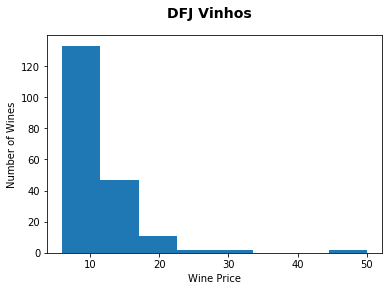

In [14]:
n_bins3 = int((50-6)/5)

fig, axs = plt.subplots()
axs.hist(df_DFJ["price"], bins=n_bins3)
fig.suptitle("DFJ Vinhos", fontsize=14, fontweight="bold")
axs.set_xlabel("Wine Price")
axs.set_ylabel("Number of Wines")

plt.show()


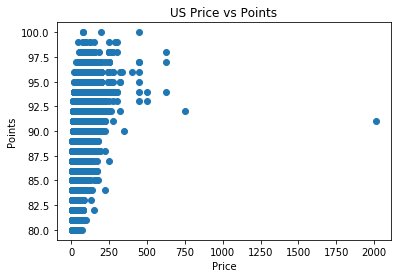

In [15]:
# Countries with more than 1000 reviews
plt.scatter(df_US["price"], df_US["points"])

plt.title("US Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

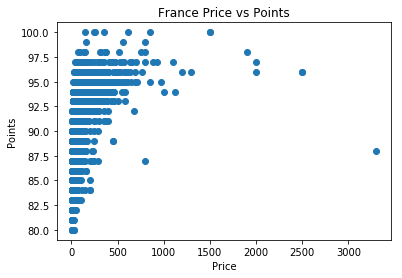

In [16]:
plt.scatter(df_Fr["price"], df_Fr["points"])
plt.title("France Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

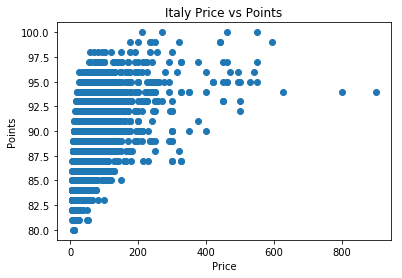

In [17]:
plt.scatter(df_It["price"], df_It["points"])

plt.title("Italy Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

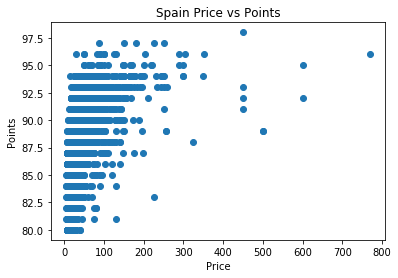

In [19]:
plt.scatter(df_Sp["price"], df_Sp["points"])

plt.title("Spain Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

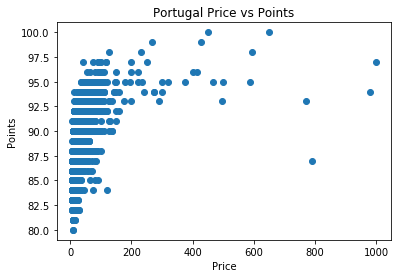

In [20]:
plt.scatter(df_P["price"], df_P["points"])

plt.title("Portugal Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

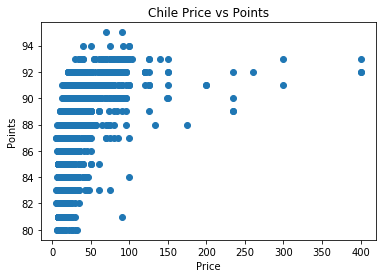

In [21]:
plt.scatter(df_Ch["price"], df_Ch["points"])

plt.title("Chile Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

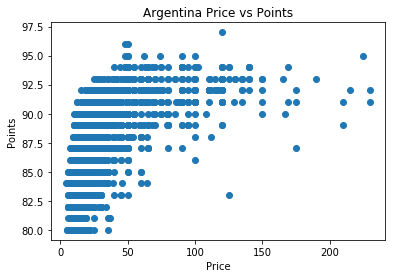

In [22]:
plt.scatter(df_Argent["price"], df_Argent["points"])

plt.title("Argentina Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

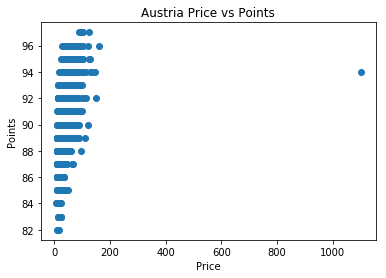

In [23]:
plt.scatter(df_Austria["price"], df_Austria["points"])

plt.title("Austria Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

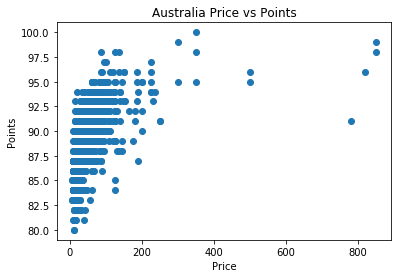

In [24]:
plt.scatter(df_Au["price"], df_Au["points"])

plt.title("Australia Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

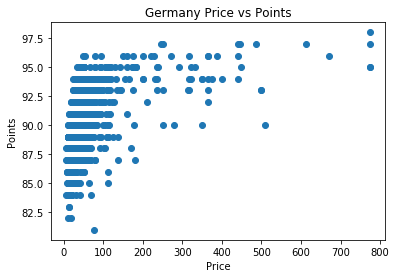

In [25]:
plt.scatter(df_Ge["price"], df_Ge["points"])

plt.title("Germany Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

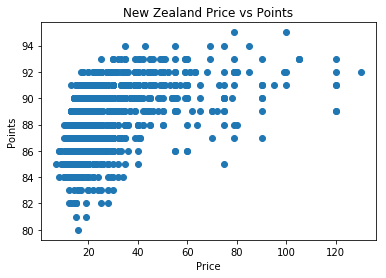

In [26]:
plt.scatter(df_NZ["price"], df_NZ["points"])

plt.title("New Zealand Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

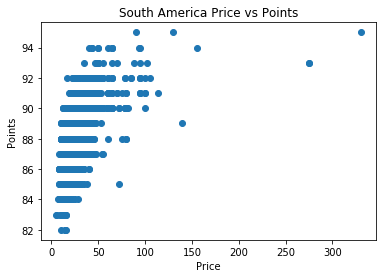

In [27]:
plt.scatter(df_SA["price"], df_SA["points"])

plt.title("South America Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

plt.show()

# Models

In [28]:
# Linear Regression Model
xaxis = df_model["price"]
yaxis = df_model["points"]

(slope, intercept, Rvalue, Pvalue, std_err) = stats.linregress(xaxis, yaxis)
fit = slope * xaxis + intercept

print(Rvalue, Pvalue, std_err)

0.41401894793844984 0.0 0.0001956510418700142


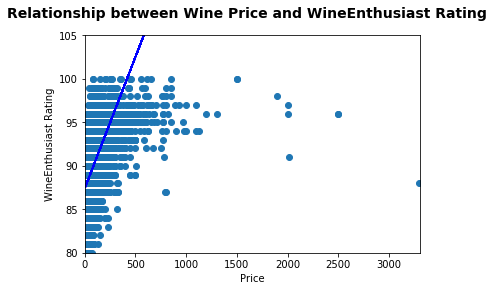

In [29]:
fig, ax = plt.subplots()

fig.suptitle("Relationship between Wine Price and WineEnthusiast Rating", fontsize=14, fontweight="bold")

ax.set_xlim(min(xaxis), max(xaxis)+5)
ax.set_ylim(min(yaxis), max(yaxis)+5)

ax.set_xlabel("Price")
ax.set_ylabel("WineEnthusiast Rating")

ax.plot(xaxis,yaxis, linewidth=0, marker='o')
ax.plot(xaxis, fit, 'b--')

plt.show()

In [30]:
log_price = np.log(df_model)
log_price = log_price.dropna()


lm_log = np.polyfit(log_price.price, log_price.points, 1)

# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_log[0] + lm_log[1]) for i in log_price.price))

lm_log_plot = pd.DataFrame({
'price' : r_x,
'points' : r_y
})



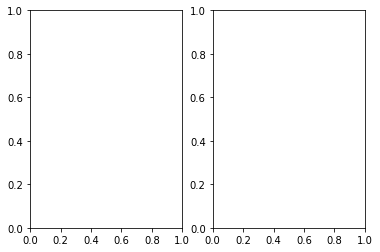

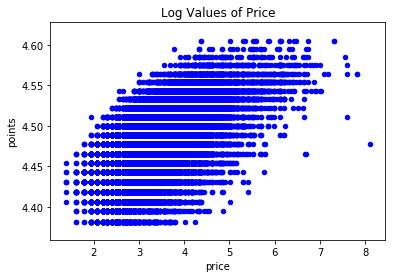

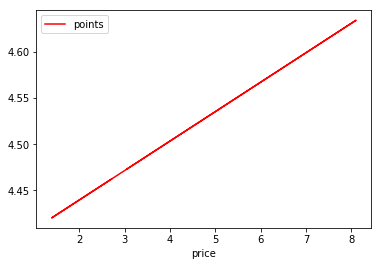

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes= log_price.plot(kind='scatter', color='Blue', x='price', y='points', title='Log Values of Price')
axes= lm_log_plot.plot(kind='line', color='Red', x='price', y='points')
 
plt.show()


The linear regression model suggests that while a statistically significant relationship exists, that is these data are not the result of random processes, the relationship is a weak one. The data appear to curve.  Transforming the data into a logrithm does seem to fit the data better.  This suggests that the relationship between price and WineEnthusiast score is a non-linear one.  